<a href="https://colab.research.google.com/github/ashfaquesayyed/Airline-passenger-referal-prediction/blob/main/airline_passenger_referral_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.

#Feature descriptions briefly as follows:
#airline: Name of the airline.
#overall: Overall point is given to the trip between 1 to 10.
#author: Author of the trip
#reviewdate: Date of the Review customer review: Review of the customers in free text format
#aircraft: Type of the aircraft
#travellertype: Type of traveler (e.g. business, leisure)
#cabin: Cabin at the flight 
#date flown: Flight date
#seatcomfort: Rated between 1-5
#cabin service: Rated between 1-5
#foodbev: Rated between 1-5 entertainment: Rated between 1-5
#groundservice: Rated between 1-5
#valueformoney: Rated between 1-5
#recommended: Binary, target variable.

In [71]:
#Importing libraries
import pandas as pd 
import numpy as np
from datetime import datetime as dt 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [72]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [73]:
# Importing the dataset
df = pd.read_excel("/content/drive/MyDrive/data folder/data_airline_reviews.xlsx")

In [74]:
#shape of dataset
df.shape

(131895, 17)

In [75]:
#head of dataset
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
#tail of dataset
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [77]:
#columns name of df
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [78]:
# description of data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,65947,81,Spirit Airlines,2934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,64017.0,NaN,NaN,NaN,5.14543,3.477532,1.0,1.0,5.0,9.0,10.0
author,65947,44069,Anders Pedersen,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_date,65947,3015,19th January 2015,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_review,65947,61172,On March 2/14 a friend and I were booked on an...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aircraft,19718,2088,A320,2157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveller_type,39755,4,Solo Leisure,14798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabin,63303,4,Economy Class,48558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,39726,24549,Bangkok to Hong Kong,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_flown,39633,63,August 2015,1204,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
#information about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [80]:
#dropping unneccessary columns
df=df.drop(columns=['author','review_date','customer_review','aircraft','date_flown'])

These columns are irrelevant with respect to dependent variable hence i am dropping this columns.

In [81]:
#unique values
df.nunique()

airline               81
overall               10
traveller_type         4
cabin                  4
route              24549
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

In [82]:

#duplicate values
df[df.duplicated()].count()

airline            11581
overall            10863
traveller_type      2412
cabin               9905
route               2409
seat_comfort        8772
cabin_service       8802
food_bev            8314
entertainment       7477
ground_service      2385
value_for_money    10362
recommended        10566
dtype: int64

In [83]:
#Droping duplicate rows
df.drop_duplicates(inplace=True)

In [84]:
#checking duplicates
df[df.duplicated()].count()



airline            0
overall            0
traveller_type     0
cabin              0
route              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

In [85]:
# remove NAN values from dataset
df.dropna(how='all',inplace=True)

In [86]:
# null values check
df.isnull().sum()

airline                0
overall             1212
traveller_type     17023
cabin                968
route              17049
seat_comfort        2457
cabin_service       2453
food_bev           10072
entertainment      17650
ground_service     17393
value_for_money      753
recommended          492
dtype: int64

In [87]:
#remove the rows where recommended value is null
df.drop(df[df['recommended'].isnull()].index, inplace = True)

In [88]:
#checking null 
a=df.isnull().sum()/len(df)*100
b=a.sort_values(ascending=False)

In [89]:
#Null values percentage
b

entertainment      31.848387
ground_service     31.371348
route              30.734677
traveller_type     30.686416
food_bev           17.782233
seat_comfort        3.647399
cabin_service       3.639975
overall             2.221851
cabin               0.885399
value_for_money     0.484464
airline             0.000000
recommended         0.000000
dtype: float64

#Null values imputation

In [90]:
#null values count in sorted order 
df.isnull().sum().sort_values(ascending=False)

entertainment      17158
ground_service     16901
route              16558
traveller_type     16532
food_bev            9580
seat_comfort        1965
cabin_service       1961
overall             1197
cabin                477
value_for_money      261
airline                0
recommended            0
dtype: int64

In [91]:
# replacing the columns with imputing values in new columns.
new_df = df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money']]

In [92]:
# Filling null values with KNN Imputer
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
new_df = pd.DataFrame(imputer.fit_transform(new_df),columns = new_df.columns)

In [93]:
#drop columns
df = df.drop(columns = ['seat_comfort','traveller_type','route','food_bev','cabin_service','overall','entertainment','ground_service', 'value_for_money'])


In [94]:
#info of new dataset
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53874 entries, 0 to 53873
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          53874 non-null  float64
 1   seat_comfort     53874 non-null  float64
 2   cabin_service    53874 non-null  float64
 3   food_bev         53874 non-null  float64
 4   entertainment    53874 non-null  float64
 5   ground_service   53874 non-null  float64
 6   value_for_money  53874 non-null  float64
dtypes: float64(7)
memory usage: 2.9 MB


In [95]:
#null value count
new_df.isnull().sum()

overall            0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
dtype: int64

In [96]:
#concatenate old and new dataframe
df = pd.concat([df.reset_index(),new_df.reset_index()], axis =1)


In [97]:
#showing datatypes in dataset
df = df.select_dtypes(include=['object','float64'])

In [98]:
df = df.reindex(columns=['airline', 'overall', 'cabin', 'seat_comfort','cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended'])

In [99]:
#dataframe
df=round(df)
df

,airline,overall,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...
53869,Ukraine International,5.0,Economy Class,3.0,2.0,3.0,4.0,2.0,4.0,no
53870,Ukraine International,2.0,NaN,2.0,2.0,2.0,1.0,1.0,2.0,no
53871,Ukraine International,3.0,NaN,2.0,2.0,3.0,3.0,3.0,2.0,no
53872,Ukraine International,4.0,NaN,3.0,4.0,2.0,2.0,2.0,2.0,no


##EXPLORATORY DATA ANALYSIS

##Outlier detection

Text(0, 0.5, 'rating')

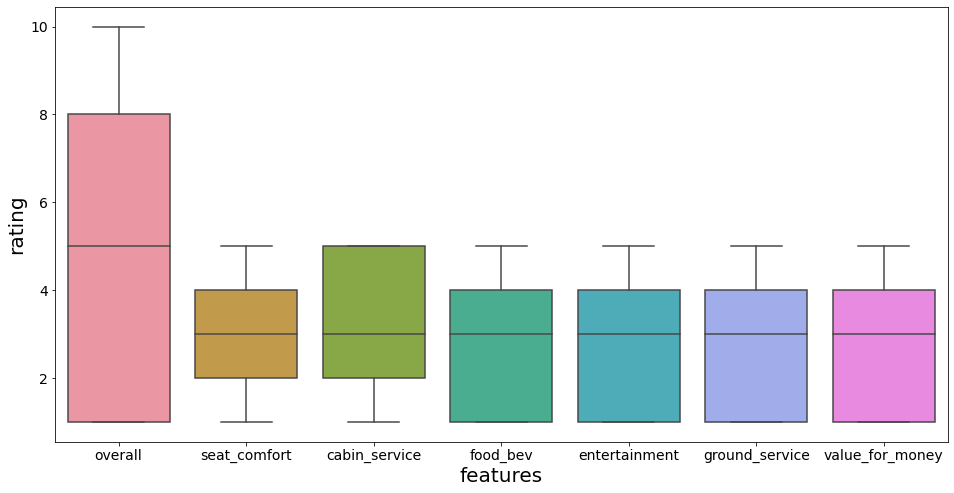

In [100]:
#boxplot
#figuresize
plt.figure(figsize =(16, 8))
#plotting boxplot 
sns.boxplot(data=df)
#Fontsize
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#Labels
plt.xlabel('features', fontsize= 20)
plt.ylabel('rating', fontsize= 20)

##Observations

Outliers are not present in data.

The median of 'Overall' is 5, The median of other features are approximately 3.

##2)Which type of Cabin has more recommendation?

In [101]:
df.head()

,airline,overall,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


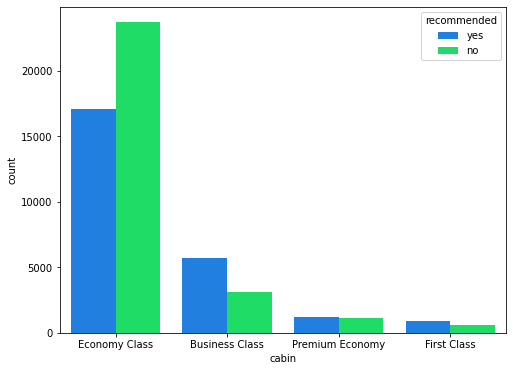

In [102]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(df['cabin'], hue=df['recommended'])



* For Economy class, Number of 'NO' recommendations are more than 'YES' recommendations.


* For business class and first class, Number of 'YES' recommendations are more than 'NO' recommendations.

*   For Premium account number of 'YES' recommendation and 'NO' recommendations are approximately equal.









 ## What is the total recommendation percentage for all airlines?

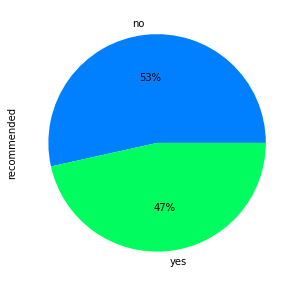

In [103]:
#Plotting bar graph to identify classes of dependent variable
sns.set_palette('gist_ncar')
df['recommended'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(10,5))

The overall recommendation percentage for all airlines is 47% which is less than recommended 'NO' by 53%. Dependent feature have balanced data.

#What is the maximum overall rating got by different airlines?

Text(0, 0.5, 'overall rating')

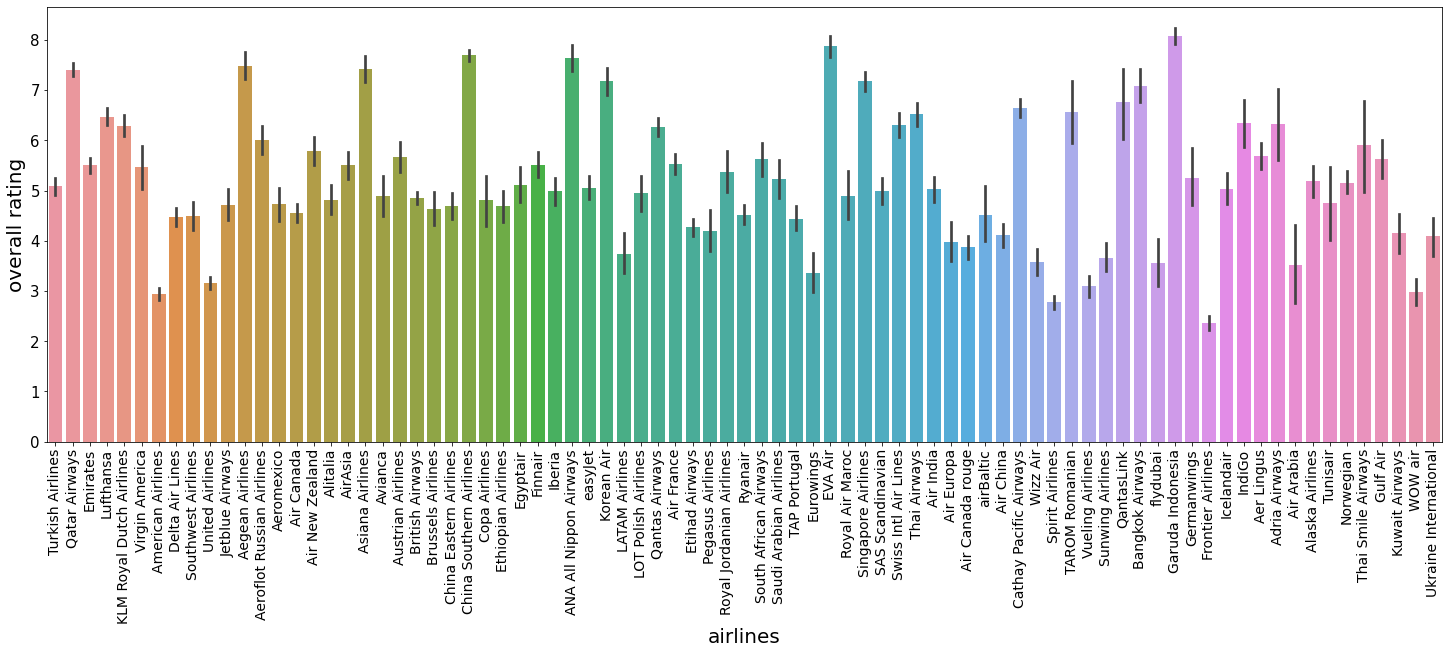

In [104]:
#figure size
plt.figure(figsize=(25,8))
#barplot
sns.barplot(x='airline', y='overall', data=df)
#font size
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)
#labels
plt.xlabel('airlines', fontsize= 20)
plt.ylabel('overall rating', fontsize= 20)

* The maximum overall ratings are received by Qatar airlines, Aegean airlines,Asiana airlines, China southern Airlines etc ( rating is around 7.5-8).
*  The minimum overall rating is around 2.5 received by frontier airlines







##Which airlines got the maximum and minmum recommendations?

Text(0, 0.5, 'Count')

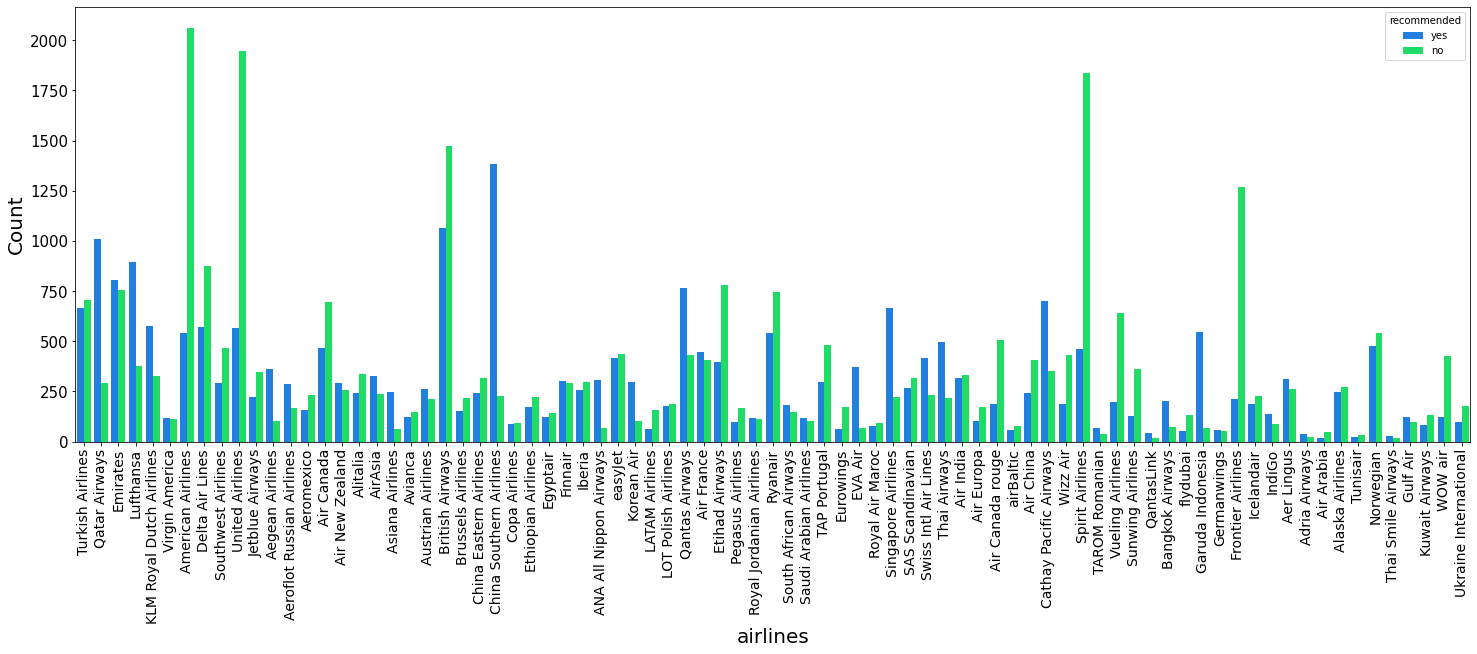

In [105]:
#figure size
plt.figure(figsize=(25,8))
#barplot
sns.countplot(x='airline', hue='recommended', data=df)
#font size
plt.xticks(rotation=90,fontsize=14)                                                             
plt.yticks(fontsize=15)
#labels
plt.xlabel('airlines', fontsize= 20)
plt.ylabel('Count', fontsize= 20)



1.   American airlines,united airlines,spirit and frontier irlines received maximum 'NO' recommendations.
2.   Chins southern airlines, Qatar  and British airways received maximum 'YES' recommendations. Thai smile, Tunisair, Air arabia, adria airways received minimum 'Yes' recommendations.



##Checking the frequency of values

In [106]:
# replacing yes =1 and no =0 in recommended column
df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [107]:
features=['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']

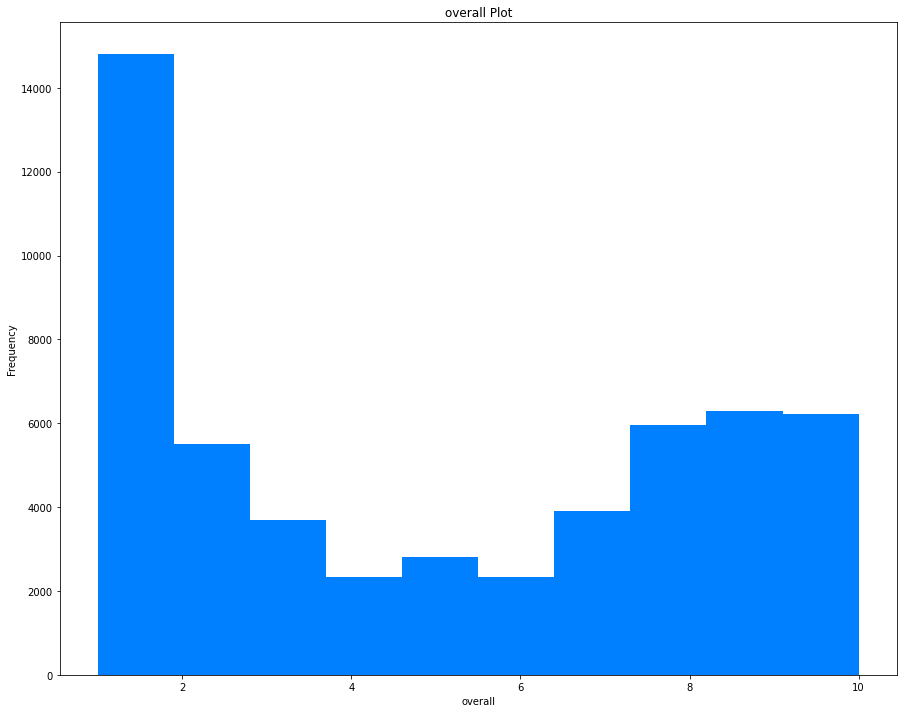

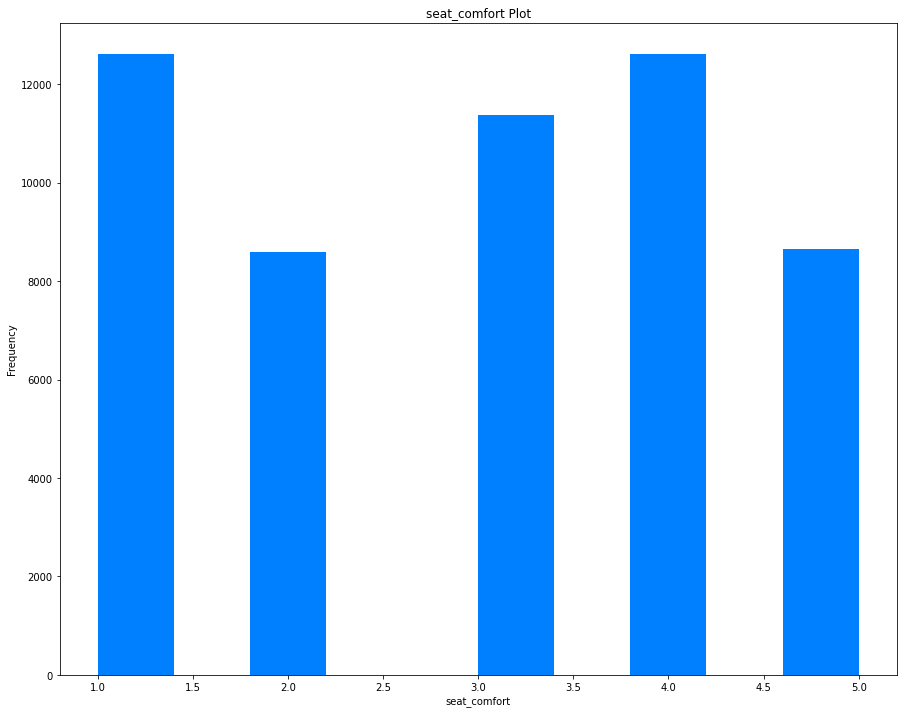

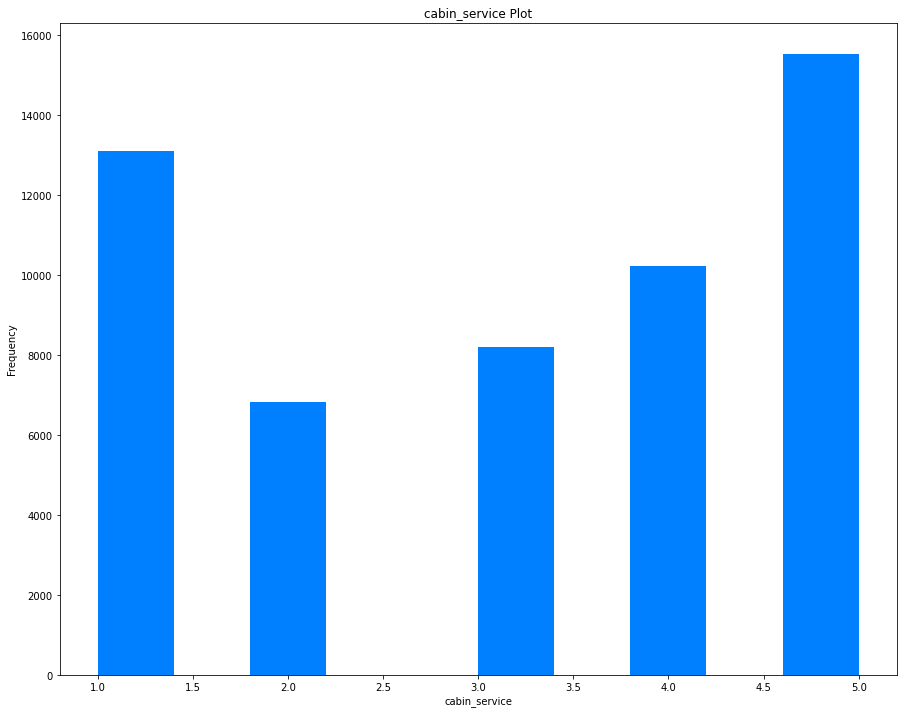

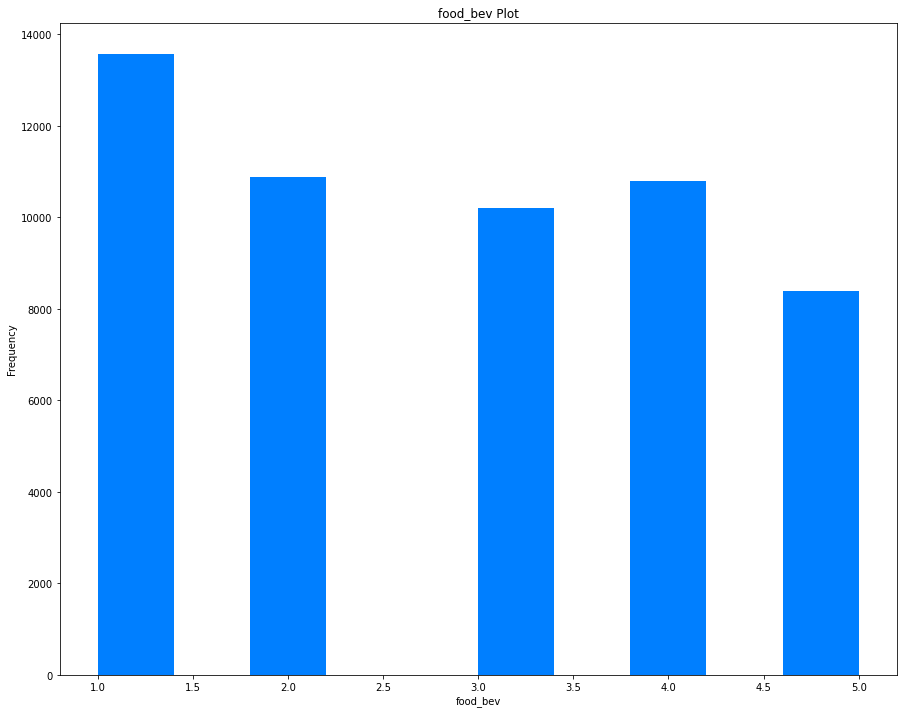

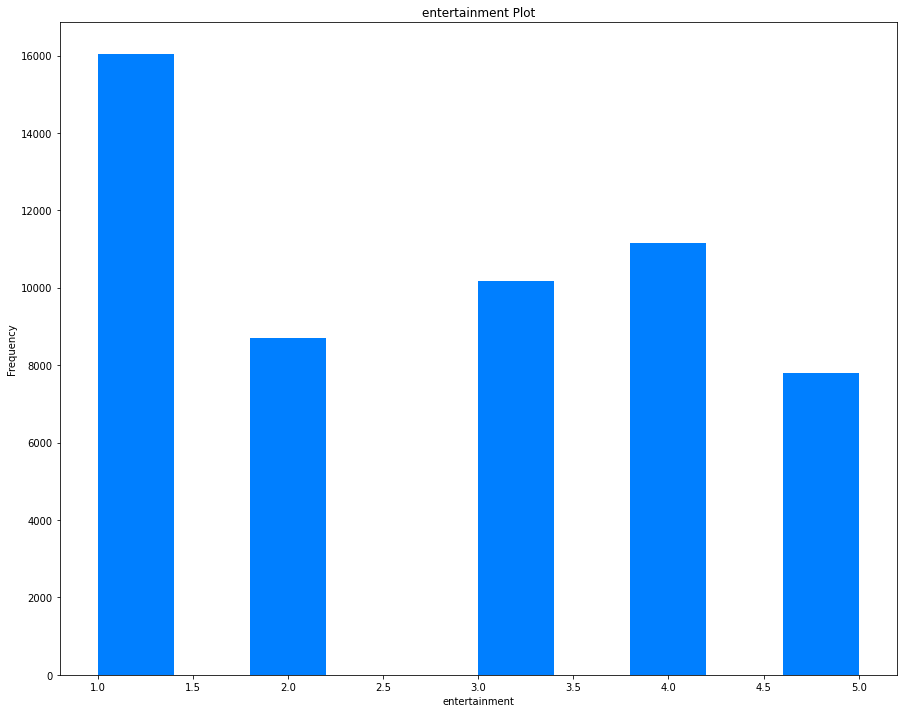

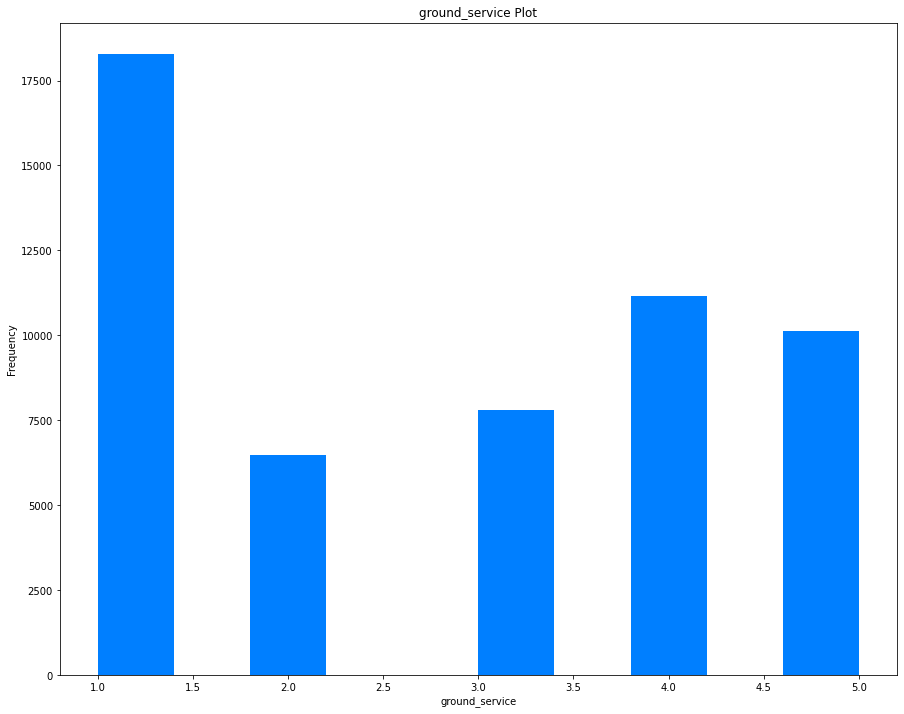

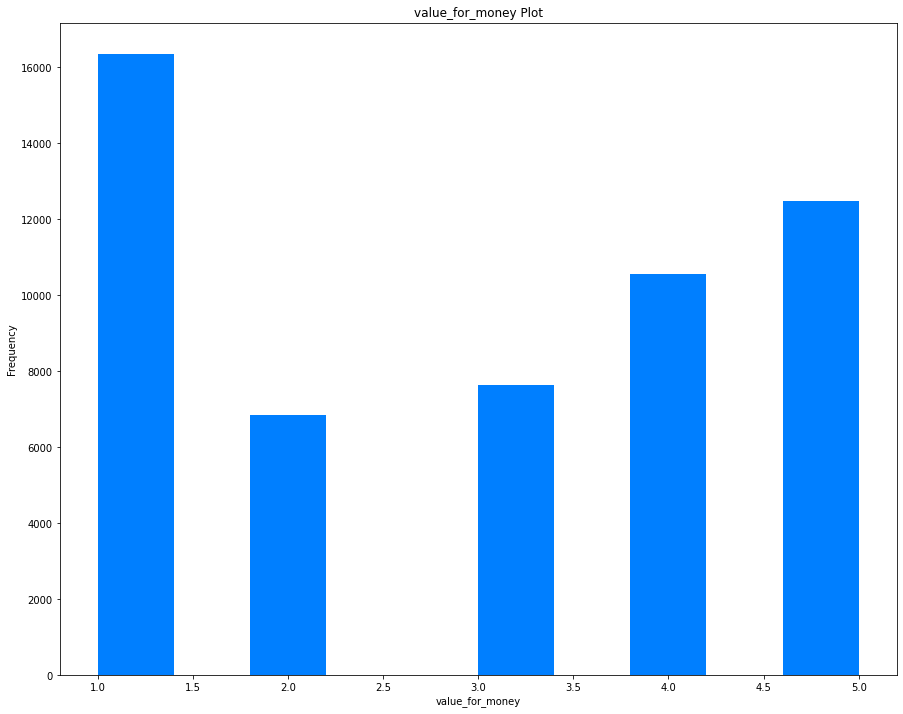

In [108]:
# plotting histogram for all numeric feature 
for i in features:
  #figure size
  plt.rcParams['figure.figsize']=(15,12)
  #histogram plot
  plt.hist(df[i], bins=10)
  #title of plot
  plt.title(i+" Plot")
  #label
  plt.xlabel(i)
  plt.ylabel("Frequency")
  plt.show()

#Conclusion

##Correlation



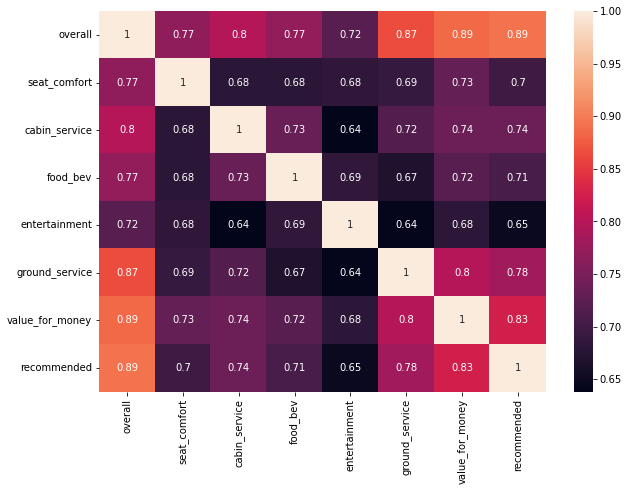

In [109]:
#setting the figure size and plotting the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)



1.  'Overall','food bev','cabin_service', 'value_for_money' etc are positively correlated with recommendation.

2.  'Overall' is most correlatetd with recommendation.

3. entertainment has 0.65 of correlation which is less than others.

4.  overall and value for money have multicollinearity.





In [110]:
# features present in dataset
features= df.columns
features

Index(['airline', 'overall', 'cabin', 'seat_comfort', 'cabin_service',
       'food_bev', 'entertainment', 'ground_service', 'value_for_money',
       'recommended'],
      dtype='object')

In [111]:
features_1=(['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money'])

In [112]:
# categoriacal features to do one hot encoding
categorical_columns =['airline','cabin']

In [113]:
dummy= pd.get_dummies(df,columns=categorical_columns , drop_first = False)

##Splitting the Data to Train and Test

In [114]:
dummy

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,airline_ANA All Nippon Airways,airline_Adria Airways,...,airline_Vueling Airlines,airline_WOW air,airline_Wizz Air,airline_airBaltic,airline_easyJet,airline_flydubai,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
0,7.0,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.0,1.0,4.0,1.0,3.0,1.0,2.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10.0,4.0,5.0,5.0,5.0,5.0,5.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53869,5.0,3.0,2.0,3.0,4.0,2.0,4.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
53870,2.0,2.0,2.0,2.0,1.0,1.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53871,3.0,2.0,2.0,3.0,3.0,3.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53872,4.0,3.0,4.0,2.0,2.0,2.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# Import libraries
from sklearn.model_selection import train_test_split

In [116]:
#getting the independent variables
X = dummy.drop('recommended', axis =1)


#getting the dependent variables
y= dummy['recommended']

In [117]:
# Perform Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

In [118]:
# Get shapes for Train and Test set
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((43099, 92), (10775, 92), (43099,), (10775,))

In [119]:
column = ['Model','Accuracy','Recall','Precision','f1-score','roc_auc_score']
evaluation_metrics_df= pd.DataFrame(columns = column)

Creating Function to store evaluation metrics values

In [120]:
#creating function for storing evaluation metrices
def evaluation_metric(model,y_test,pred_value,metric_df):
  metric_df= metric_df.append({'Model': model,
                               'Accuracy':accuracy_score(y_test,pred_value),
                               'Recall':recall_score(y_test,pred_value),
                               'Precision':precision_score(y_test,pred_value),
                               'f1-score':f1_score(y_test,pred_value),
                               'roc_auc_score':roc_auc_score(y_test,pred_value)},ignore_index=True)
  return metric_df

##Logistic Regression

In [121]:
#logistic regression
lr= LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
score=lr.score(X_test,y_test)
print(f'Logistic regression score : {score}')

Logistic regression score : 0.9509976798143851


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5766
           1       0.95      0.94      0.95      5009

    accuracy                           0.95     10775
   macro avg       0.95      0.95      0.95     10775
weighted avg       0.95      0.95      0.95     10775


Accuracy score % of the model is 95.1%



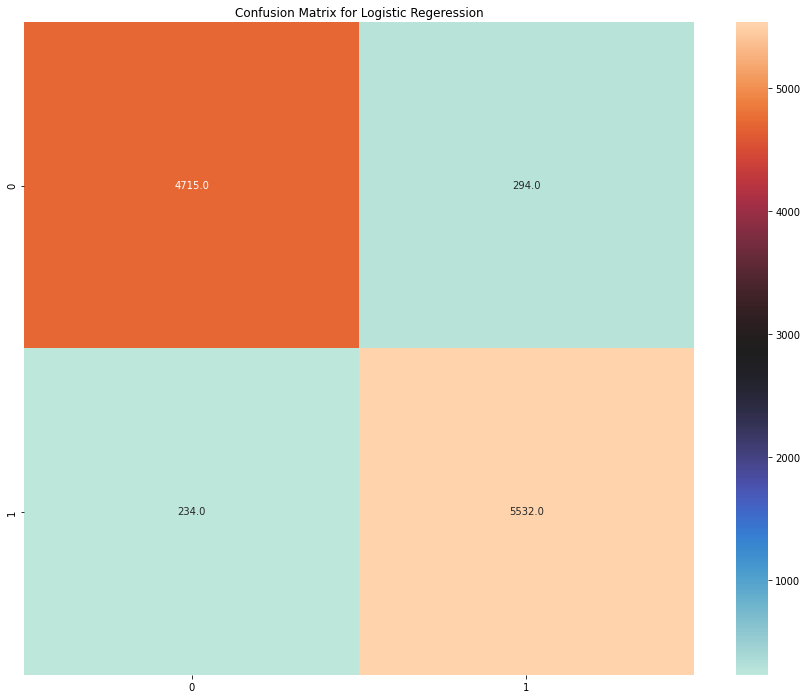

In [122]:
#model evaluation
pred_value = lr.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Logistic Regeression')

#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Logistic Regression',y_test,pred_value,evaluation_metrics_df)

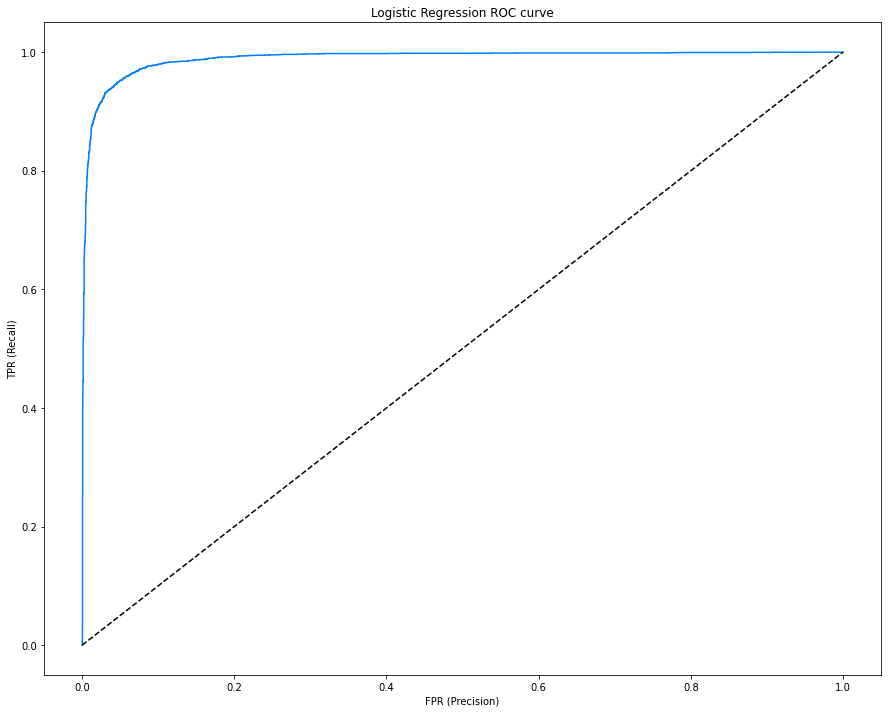

In [123]:
#ROC curve
lr_probability =lr.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

##Decision Tree

In [124]:
#Decision Tree
dtc =DecisionTreeClassifier()
dtc.fit(X_train,y_train)
score=dtc.score(X_test,y_test)
print(f'Decision Tree score : {score}')

Decision Tree score : 0.9324361948955916


              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5766
           1       0.93      0.92      0.93      5009

    accuracy                           0.93     10775
   macro avg       0.93      0.93      0.93     10775
weighted avg       0.93      0.93      0.93     10775


Accuracy score % of the model is 93.24%



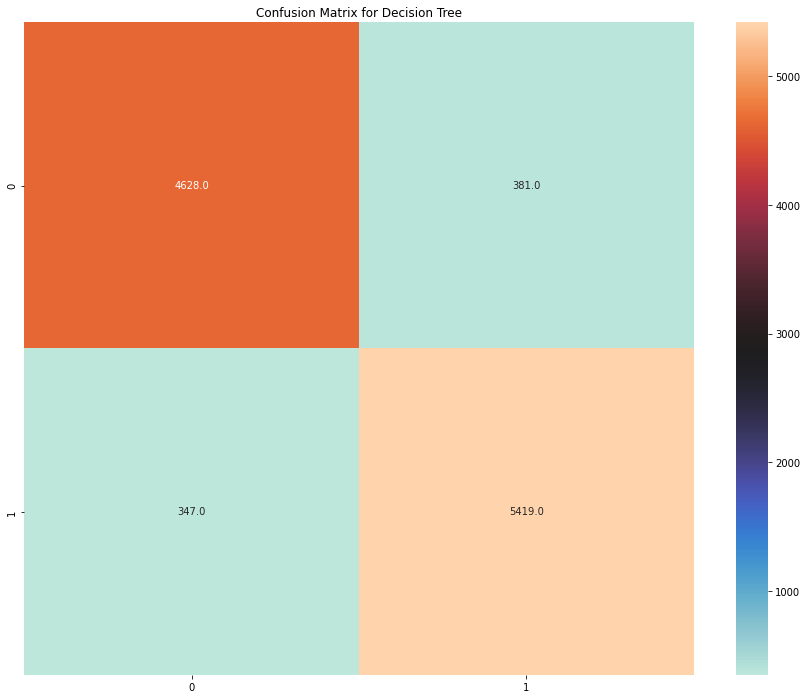

In [125]:
#model evaluation
pred_value = dtc.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Decision Tree')

#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Decision Tree',y_test,pred_value,evaluation_metrics_df)

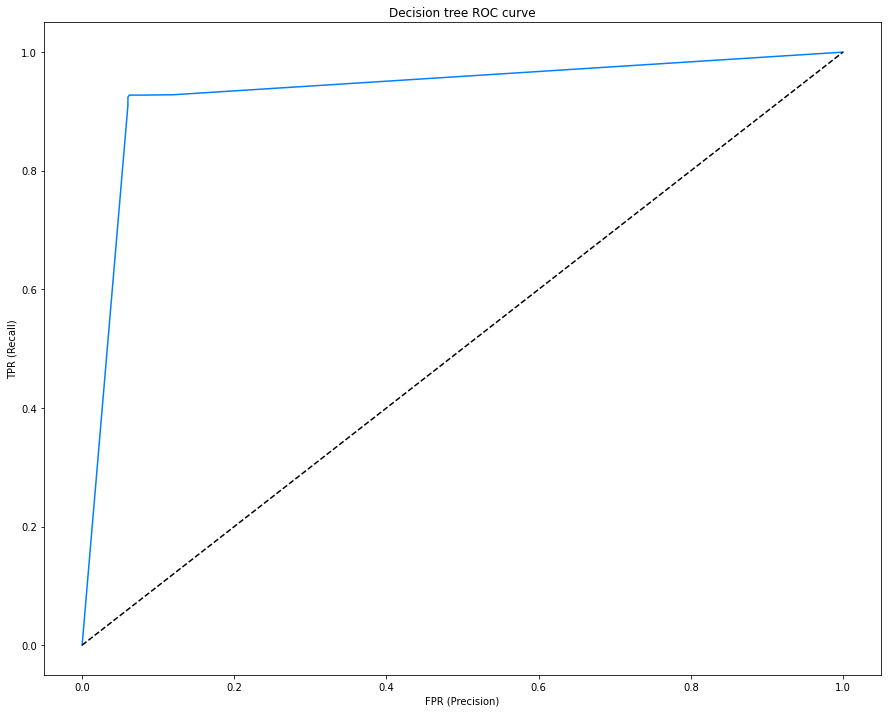

In [126]:
#ROC curve of decision tree
dtc_probability =dtc.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test, dtc_probability)

plt.title('Decision tree ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

##Random forest

In [127]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
score=rf.score(X_test,y_test)
print(f'Random Forest score : {score}')

Random Forest score : 0.9495127610208817


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5766
           1       0.95      0.94      0.95      5009

    accuracy                           0.95     10775
   macro avg       0.95      0.95      0.95     10775
weighted avg       0.95      0.95      0.95     10775


Accuracy score % of the model is 94.95%



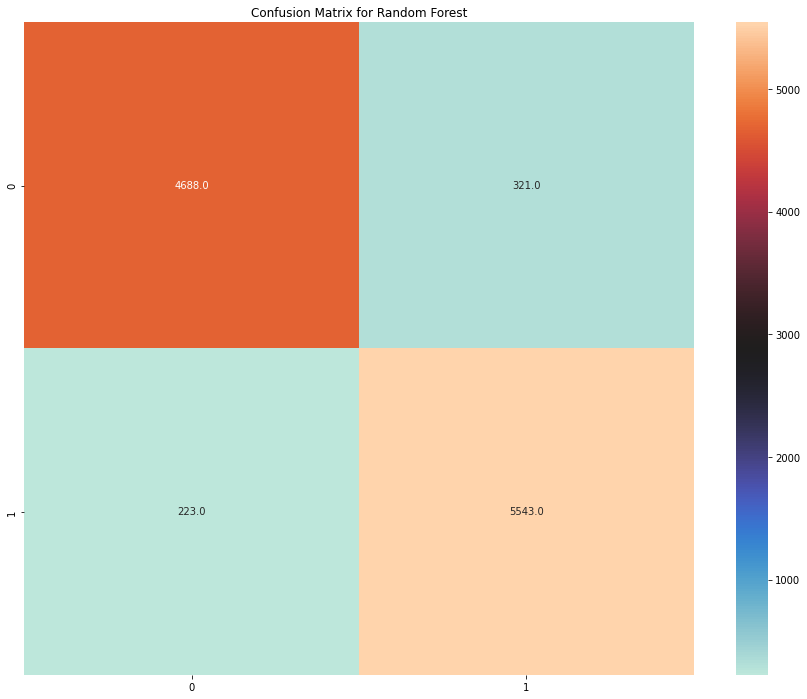

In [128]:
pred_value = rf.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Random Forest')


#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Random Forest',y_test,pred_value,evaluation_metrics_df)

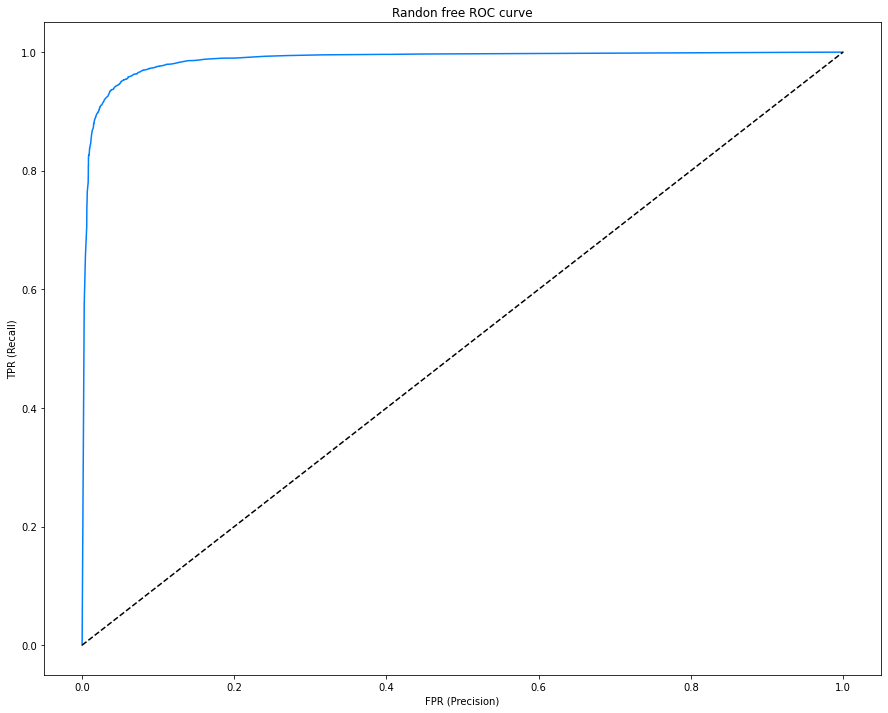

In [129]:
#ROC curve of decision tree
rf_probability =rf.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test, rf_probability)

plt.title('Randon free ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

##K_nearest Neighbour Model

In [130]:
#using knn 
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
score=knn.score(X_test,y_test)
print(f'K-nearest-neighbour score : {score}')

K-nearest-neighbour score : 0.9464501160092808


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5766
           1       0.95      0.94      0.94      5009

    accuracy                           0.95     10775
   macro avg       0.95      0.95      0.95     10775
weighted avg       0.95      0.95      0.95     10775


Accuracy score % of the model is 94.65%



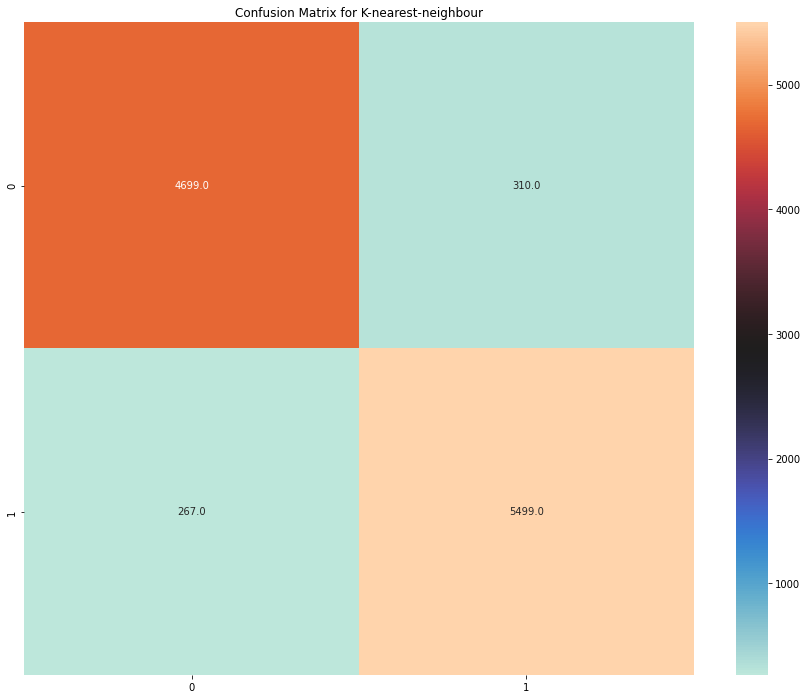

In [131]:
#model evaluation
pred_value=knn.predict(X_test)
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])
print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for K-nearest-neighbour')
#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('K-nearest-neighbour',y_test,pred_value,evaluation_metrics_df)


In [132]:
knn_probability =knn.predict_proba(X_test)[::,1]
#area under curve
auc_score=roc_auc_score(y_test,knn_probability)
auc_score

0.9776157685503588

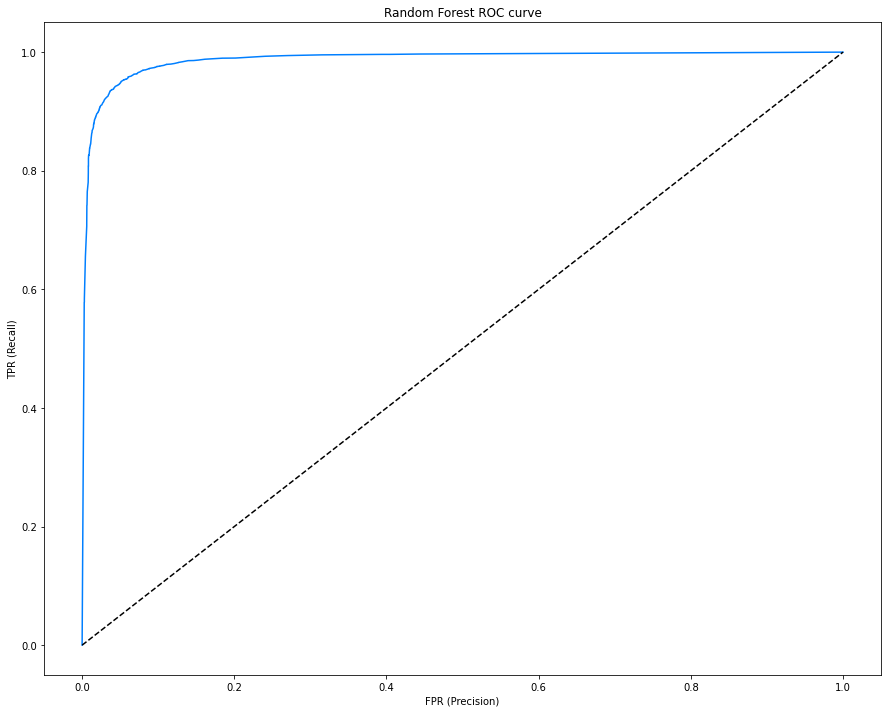

In [133]:
#ROC curve plot
fpr, tpr, _ = roc_curve(y_test, rf_probability)

plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

##Accuracy is good, let's try cross validation once. 

##Random Forest with GridSearchCV

In [134]:
#Hyperparametric Tuning to get best parameter for evaluation
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}

In [135]:
#uassigning grid search variable
rf_grid = GridSearchCV(estimator=rf,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

In [136]:
#Evaluating the optimal parameters
rf_grid.fit(X_train,y_train)
rf_grid.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.3s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.3s
[CV] END max_depth=6, min_sa

RandomForestClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=10)

In [137]:
#getting best parameter from grid search
rf_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 30,
 'min_samples_split': 10,
 'n_estimators': 100}

In [138]:
#assigning best param variable
rf_grid_best = rf_grid.best_estimator_

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5766
           1       0.96      0.94      0.95      5009

    accuracy                           0.95     10775
   macro avg       0.95      0.95      0.95     10775
weighted avg       0.95      0.95      0.95     10775


Accuracy score % of the model is 95.02%



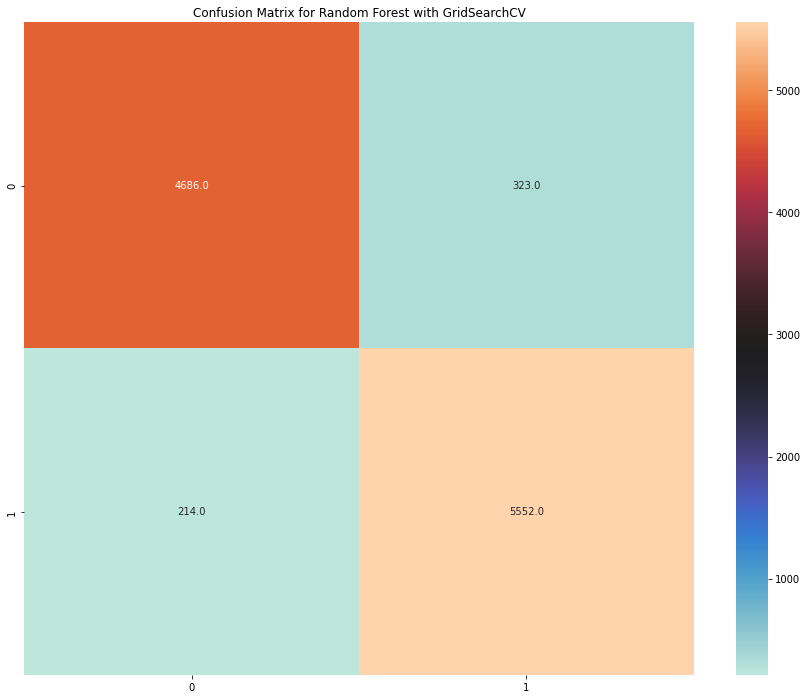

In [139]:
#model evaluation
pred_value = rf_grid_best.predict(X_test)


print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Random Forest with GridSearchCV')


#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Random Forest with GridSearchCV',y_test,pred_value,evaluation_metrics_df)

In [140]:
# predict the probability after hyperparameter tuning
rf_gridprobability=rf_grid_best.predict_proba(X_test)[::,1]
#area under curve
auc_score=roc_auc_score(y_test,rf_gridprobability)
auc_score

0.9874562243044034

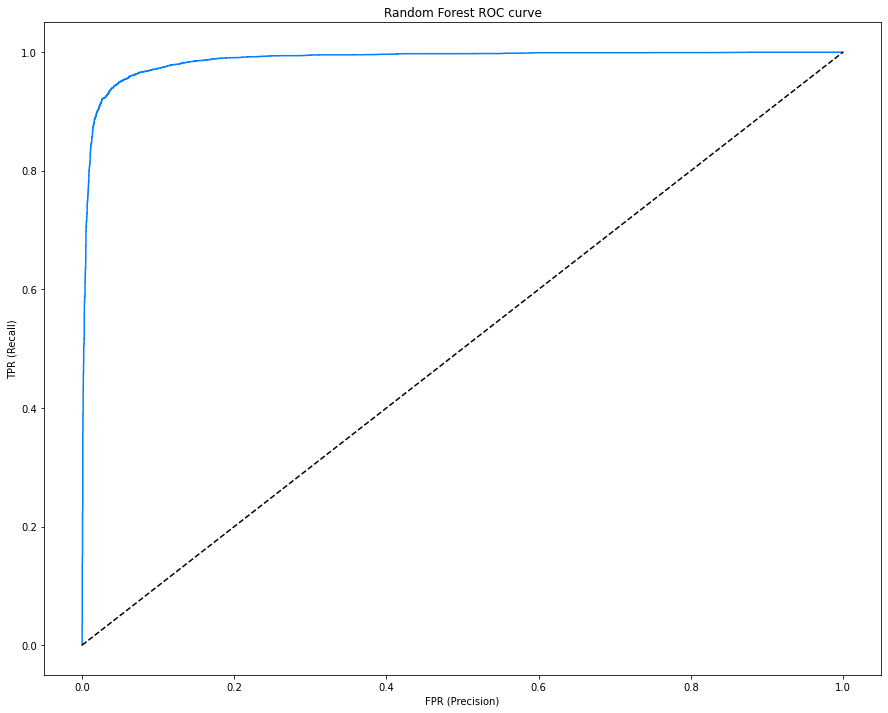

In [141]:
#ROC curve plot
fpr, tpr, _ = roc_curve(y_test, rf_gridprobability)

plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

##Conclusion

1.  'Overall','food bev','cabin_service', 'value_for_money' etc are positively correlated with recommendation. these parameters should be improved to provide better service and hence it will improve recommendation chances for airline.
2. Logistic regression, decision tree, random forest and K-Nearest neighbour gave good results in terms of accuracy. Highest accuracy obtained is 95.1% with logistic regression.
3. Random forest with Gridsearch CV also gave good accuracy approximately equal to logistic regression (95.08%).